# Just a quick VQE in Qiskit test

Making my own implementation in Qiskit of some code for VQE previously done in pyQuil on [this awesome site](dkopczyk.quantee.co.uk/vqe)

__Make necessary imports__

In [1]:
from qiskit import Aer, execute, QuantumRegister, QuantumCircuit, ClassicalRegister
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


__Define an Ansatz function (we'll use the RY operator)__

In [6]:
def ansatz(circuit, qureg, theta):
    return circuit.ry(theta, qureg[0])

__Define expectation value function__

In [7]:
def expectation(theta):
    # Number of runs for measurement
    shots = 10000
    
    # Prepare state by instantiating requisite objects and applying ansatz operator
    q = QuantumRegister(1, 'q')
    c = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(q, c)
    ansatz(qc, q, theta)
    
    # measure
    qc.measure(q, c)
    
    # create job object and run job, get results, get counts
    job = execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # get frequency of measurement results
    # note: counts is a dict with '0' or '1' as keys. However, if no 0's or 1's are measured
    # it won't appear as a key. We need to supply the second argument to .get() as a default in
    # case that key does not appear
    freq_0 = counts.get('0', 0)/shots
    freq_1 = counts.get('1', 0)/shots
    
    return freq_0 - freq_1

__ Create backend instance, run expectation on a test theta__

In [9]:
# retrieve simulator from Aer provider
backend = Aer.get_backend('qasm_simulator')

# create a test instance of expectation:
test = expectation(0.0)
print(test)

1.0


__ Lets plot a range of theta values to visualize where the lowest expectation value occurs__

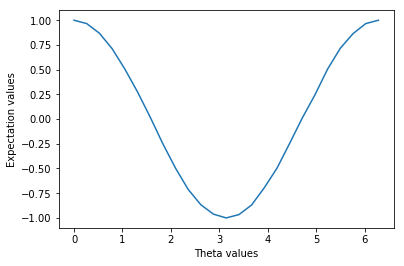

In [11]:
theta_range = np.linspace(0, 2*np.pi, 25)
data = [expectation(theta) for theta in theta_range]

plt.xlabel('Theta values')
plt.ylabel('Expectation values')
plt.plot(theta_range, data)